In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("book_data.csv")
df = df.drop_duplicates()
df.dropna(inplace=True)

## Phân tích hồi quy biến phụ thuộc Original_price

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
def LR(x, y):
    X = df[[x]]
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    return score.round(3), model.coef_[0].round(3)

In [102]:
# Dùng LabelEncoder để chuyển đổi giá trị chuỗi sang số
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['authors'] = le.fit_transform(df['authors'])
df['original_price'] = le.fit_transform(df['original_price'])
df['current_price'] = le.fit_transform(df['current_price'])
df['quantity'] = le.fit_transform(df['quantity'])
df['category'] = le.fit_transform(df['category'])
df['n_review'] = le.fit_transform(df['n_review'])
df['avg_rating'] = le.fit_transform(df['avg_rating'])
df['pages'] = le.fit_transform(df['pages'])
df['manufacturer'] = le.fit_transform(df['manufacturer'])

r2 = ['R-squared']
for i in range(len(df.columns) - 1):
    a, _ = LR(df.columns[i], df.columns[3])
    r2.append(a)
    
li = {'result': [],
      'product_id': [],
      'title': [],
      'authors': [],
      'original_price': [],
      'current_price': [],
      'quantity': [],
      'category': [],
      'n_review': [],
      'avg_rating': [],
      'pages': [],
      'manufacturer': []}

LR_original_price = pd.DataFrame(li)
LR_original_price.loc[len(LR_original_price)] = r2
LR_original_price

,result,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,R-squared,-0.019,-0.015,-0.009,1.0,0.904,-0.019,-0.012,-0.016,-0.005,0.248,0.009


Nhìn vào DataFrame ở trên, 'current_price', 'pages' có ảnh hưởng tới 'original_price'

### Số lượng trang sách ảnh hưởng thế nào đến giá gốc?

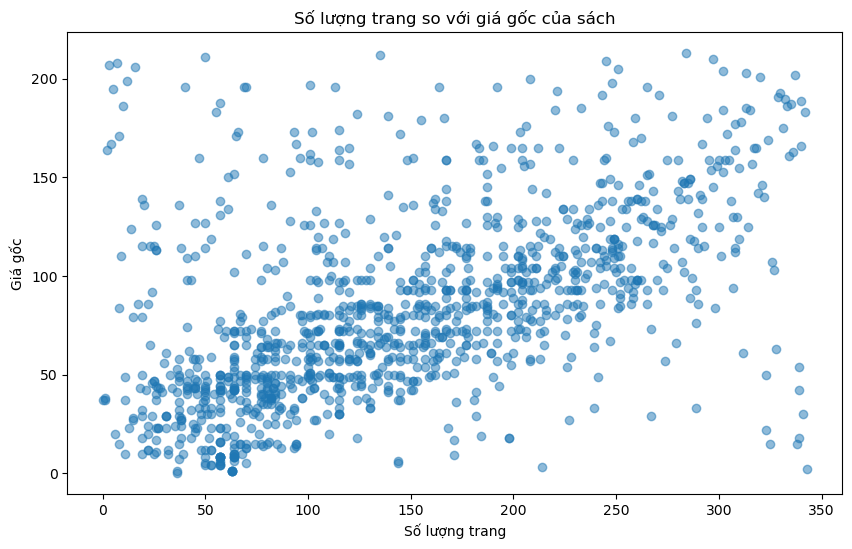

In [8]:
so_luong_trang = df['pages']
gia_goc = df['original_price']

# Vẽ biểu đồ Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(so_luong_trang, gia_goc, alpha=0.5)
plt.title('Số lượng trang so với giá gốc của sách')
plt.xlabel('Số lượng trang')
plt.ylabel('Giá gốc')
plt.show()

Gọi:

<li>x: Số lượng trang</li>

<li>y: giá gốc</li>

<li>B0: hệ số chặn</li>

<li>B1: hệ số hồi quy</li>

y = B0 + B1*x 

In [9]:
# Tính toán hệ số hồi quy
slope, intercept, r_value, p_value, std_err = stats.linregress(so_luong_trang, gia_goc)

print("Hệ số chặn:", intercept)
print("Hệ số hồi quy:", slope)
print("Giá trị t-statistic:", slope / std_err)
print("Giá trị p-value:", p_value)

Hệ số chặn: 38.14235568882429
Hệ số hồi quy: 0.301855735157353
Giá trị t-statistic: 21.91827579604602
Giá trị p-value: 8.013563492965902e-90


Như vậy: Giá gốc = 38.1 + 0.3*Số trang sách

Kiểm định giả thuyết:

<li>H1: Số lượng trang sách ảnh hưởng đến giá gốc</li>
<li>H0: Số lượng trang sách không ảnh hưởng đến giá gốc</li>

Với p-value = 9.102988283630056e-91 < $\alpha$ = 0.05

-> Bác bỏ H0, chấp nhận H1

<u>Kết luận</u>: Dựa vào R-squared = 0.248 và p-value ở trên thì, số lượng trang sách có ảnh hưởng đáng kể đến giá gốc trong mô hình hồi quy tuyến tính. Tuy nhiên, giá trị R-squared không cao (chỉ 24.8%), cho thấy có yếu tố khác ngoài biến số lượng trang cũng đóng góp vào biến thiên của giá gốc.


### Giá hiện tại so với giá gốc

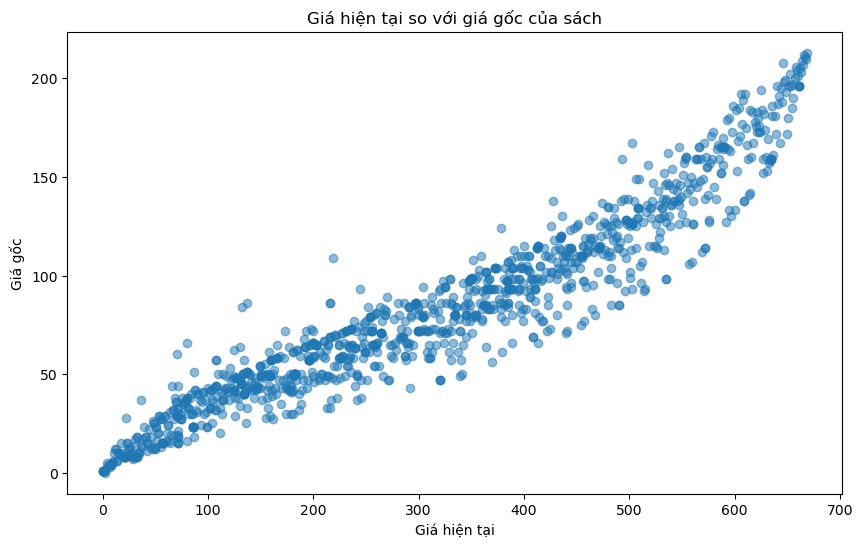

In [60]:
gia_hien_tai = df['current_price']
gia_goc = df['original_price']

# Vẽ biểu đồ Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(gia_hien_tai, gia_goc, alpha=0.5)
plt.title('Giá hiện tại so với giá gốc của sách')
plt.xlabel('Giá hiện tại')
plt.ylabel('Giá gốc')
plt.show()

In [61]:
# Tính toán hệ số hồi quy
slope, intercept, r_value, p_value, std_err = stats.linregress(gia_hien_tai, gia_goc)

print("Hệ số chặn:", intercept)
print("Hệ số hồi quy:", slope)
print("Giá trị t-statistic:", slope / std_err)
print("Giá trị p-value:", p_value)

Hệ số chặn: 5.382852675974917
Hệ số hồi quy: 0.24597556630847311
Giá trị t-statistic: 109.68018668322776
Giá trị p-value: 0.0


Như vậy ta được dự đoán mô hình: *Giá gốc* = 5.38 + 0.25 x *Giá hiện tại*

Kiểm định giả thuyết:

<li>H1: Giá hiện tại sách ảnh hưởng đến giá gốc</li>
<li>H0: Giá hiện tại  không ảnh hưởng đến giá gốc</li>

Với p-value = 0 < $a$ = 0.05
-> Bác bỏ H0, chấp nhận H1

<u>Kết luận</u>: Dựa vào R-squared= 0.904 và p-value ở trên thì, giá hiện tại có ảnh hưởng đáng kể đến giá gốc trong mô hình hồi quy tuyến tính.

In [103]:
r2 = ['R-squared']
for i in range(len(df.columns) - 1):
    a, _ = LR(df.columns[i], df.columns[5])
    r2.append(a)
    
LR_rating = pd.DataFrame(li)
LR_rating.loc[len(LR_rating)] = r2
LR_rating

,result,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,R-squared,0.344,-0.012,-0.002,-0.017,-0.012,1.0,-0.005,0.915,0.05,-0.007,0.027


Sự tương quan giữa avg_rating và quantity

Sự tương quan giữa avg_rating và n_review

Sự tương quan giữa avg_rating và n_review

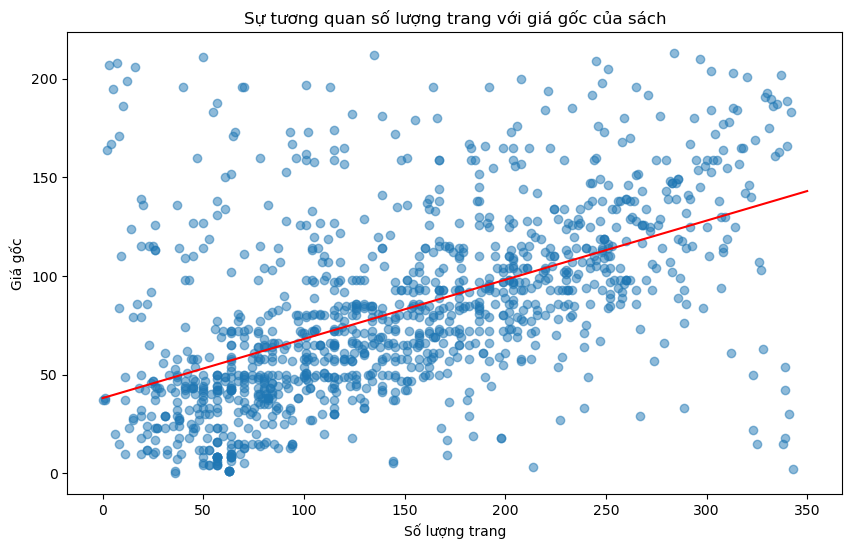

In [16]:
so_luong_trang = df['pages']
gia_goc = df['original_price']

# Vẽ biểu đồ Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(so_luong_trang, gia_goc, alpha=0.5)
plt.title('Sự tương quan số lượng trang với giá gốc của sách')
plt.xlabel('Số lượng trang')
plt.ylabel('Giá gốc')

x = np.linspace(0, 350, 100)
y = 0.3*x + 38.1
plt.plot(x,y, 'red')
plt.show()

In [17]:
df.pages.describe()

count    1201.000000
mean      146.374688
std        83.153279
min         0.000000
25%        77.000000
50%       137.000000
75%       208.000000
max       343.000000
Name: pages, dtype: float64

### Sự tương quan Current_price với Avg_rating

Accuracy: 0.9586776859504132
F1-score: 0.9789029535864979


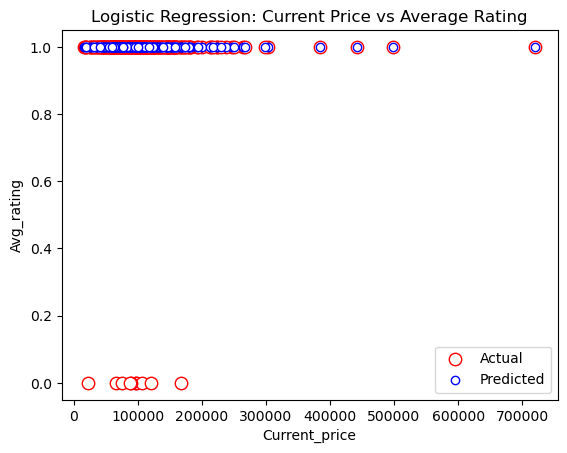

In [96]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('book_data.csv')
df.dropna(axis=0, inplace=True)

gia_hien_tai = df[['current_price']]
danh_gia = df['avg_rating']

# Sách hay thì có lượt đánh giá >= 4
danh_gia_2 = danh_gia.apply(lambda x: 1 if x >= 4 else 0)

X_train, X_test, y_train, y_test = train_test_split(gia_hien_tai, danh_gia_2, test_size=0.2, random_state=40)

model_log = LogisticRegression()
model_log.fit(X_train,y_train)

y_pred = model_log.predict(X_test)

accuracy = model_log.score(X_test, y_test)
print('Accuracy:', accuracy)

# Tính f1
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

plt.scatter(X_test,y_test,edgecolor='red',facecolor= 'white',s=80, label='Actual')
plt.scatter(X_test,y_pred,edgecolor='blue',facecolor= 'white', label='Predicted')
plt.xlabel('Current_price')
plt.ylabel('Avg_rating')
plt.title('Logistic Regression: Current Price vs Average Rating') 
plt.legend()
plt.show()

<li>Sách có mức giá thấp thì có lượt đánh giá thấp hoặc cao, mà mức độ lượt đánh giá cao nhiều hơn </li>
<li>Trong khi đó sách có mức giá cao thì chắc chắn có lượt đánh giá cao</li>
<li>Dựa vào biểu đồ, Accuracy và F1-score, mô hình có khả năng dự đoán tốt cho trường hợp sách có lượt đánh giá cao</li>
Sách có mức giá thấp thì vẫn có lượt đánh giá cao, như vậy lượt đánh giá sách không bị ảnh hưởng nhiều bởi mức giá bán ra, mà có thể dựa trên các tiêu chí khác(nội dung, thể loại ...)</li>

### Sự tương quan Quantity với Avg_rating

Mean Squared Error: 0.33358298898071637
R-squared: 0.45175099494780535


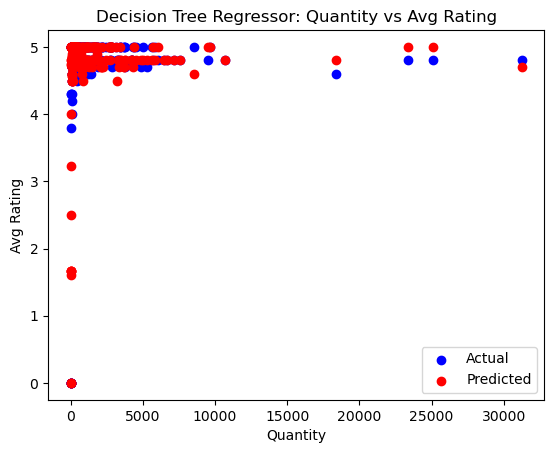

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ file CSV
df = pd.read_csv('book_data.csv')
df.dropna(inplace=True)

# Tách biến độc lập và biến phụ thuộc
X = df[['quantity']]
y = df['avg_rating']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree Regression
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = regressor.predict(X_test)

# Đánh giá hiệu suất bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = regressor.score(X_test, y_test)
print("R-squared:", r_squared)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Avg Rating')
plt.title('Decision Tree Regressor: Quantity vs Avg Rating')
plt.legend()
plt.show()

<li> Các điểm dữ liệu được tập trung ở góc trên bên trái biểu đồ, điều này cho thấy số lượng sách bán ra không nhiều nhưng vẫn có điểm đánh giá cao</li>
<li> Dựa vào biểu đồ, MSE và R-squared, mặc dù có một số điểm dự đoán và thực tế có sự sai lệch nhưng nhìn chung thì các điểm dự đoán và các điểm thực tế đều có xu hướng trùng nhau, do đó mô hình này có khả năng dự đoán khá tốt</li>

    Mean Squared Error (MSE): có giá trị khá nhỏ (~0.33), cho thấy mô hình Decision Tree Regression đã có khả năng dự đoán tương đối chính xác điểm đánh giá trung bình của sản phẩm ('avg_rating') dựa trên số lượng sản phẩm đã bán ('quantity').

    R-squared =  0.45175099494780535, cho thấy mô hình có khả năng giải thích được khoảng 45% sự biến thiên của 'avg_rating' dựa trên 'quantity'. Mặc dù không cao, nhưng giá trị R-squared vẫn cho thấy mô hình có một mức độ giải thích khá tốt.

### Sự tương quan n_review với Avg_rating

R2 score: 0.9518235381693071
MSE: 0.02904622588184815
RMSE: 0.1704295334789371
MAE: 0.13888908742643136


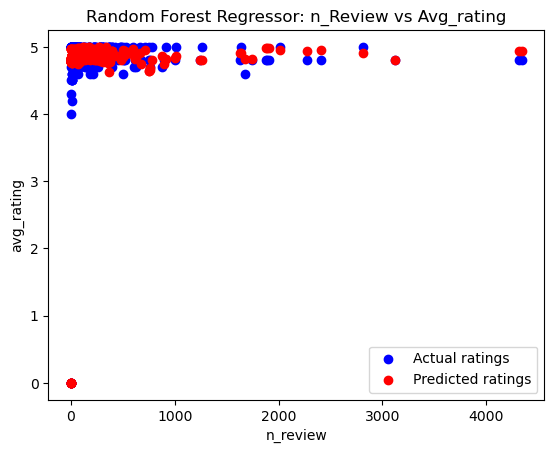

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Tách biến độc lập và biến phụ thuộc
X = df[['n_review']]
y = df['avg_rating']

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest Regression
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# In kết quả của mô hình
y_pred = regressor.predict(X_test)

# Đánh giá hiệu suất của mô hình
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("R2 score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Vẽ scatter plot của dữ liệu thực tế
plt.scatter(X_test, y_test, color='blue', label='Actual ratings')

# Vẽ line plot của kết quả dự đoán từ mô hình
plt.scatter(X_test, y_pred, color='red', label='Predicted ratings')

# Đặt tiêu đề và chú thích cho biểu đồ
plt.title('Random Forest Regressor: n_Review vs Avg_rating')
plt.xlabel('n_review')
plt.ylabel('avg_rating')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

<li> Các điểm dữ liệu được tập trung ở góc trên bên trái biểu đồ, tuy có một số điểm có lượt review ít, điểm đánh giá trung bình không cao nhưng hầu hết số lượng review khoảng(0, 3000) là có điểm đánh giá cao</li>

    R-squared (R2) ~ 0.95

    Mean Squared Error (MSE) ~ 0.03

    Root Mean Squared Error (RMSE) ~ 0.17

    Mean Absolute Error (MAE) ~ 0.14

<li> Dựa vào biểu đồ, thêm với R-squared gần giá trị 1 và MSE, RMSE, MAE đều gần 0 nên mô hình RFR có khả năng dự đoán điểm đánh giá trung bình của sách dựa trên số lượt đánh giá </li>